In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Dataset-for-498-V4.csv')


In [3]:
dataset = dataset[['Duration','Operational Cost', 'Total Fund', 'Revenue', 'Profit','Net Profit Margin', 'Valuation','Userbase','Daily Active User']]
dataset = dataset.dropna()

In [4]:
def removePercentage(value):
    decimal_value=value[:-1]
    decimal_value=(int(decimal_value)/100)
    return decimal_value

In [5]:
dataset['Net Profit Margin'] = dataset['Net Profit Margin'].apply(lambda x: removePercentage(x))
dataset.head()

,Duration,Operational Cost,Total Fund,Revenue,Profit,Net Profit Margin,Valuation,Userbase,Daily Active User
0,0.0,120000,1000000,520000,400000,0.77,1400000,200000,46000.0
1,0.5,120000,1000000,520000,400000,0.77,1400000,200000,46000.0
2,1.0,120000,1000000,520000,400000,0.77,1400000,200000,46000.0
3,1.5,220000,1000000,520000,300000,0.58,1300000,200000,46000.0
4,2.0,220000,1000000,520000,300000,0.58,1300000,200000,46000.0


In [6]:
X = dataset.drop('Valuation', axis=1)
y = dataset['Valuation']

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Accuracy: 99.75%


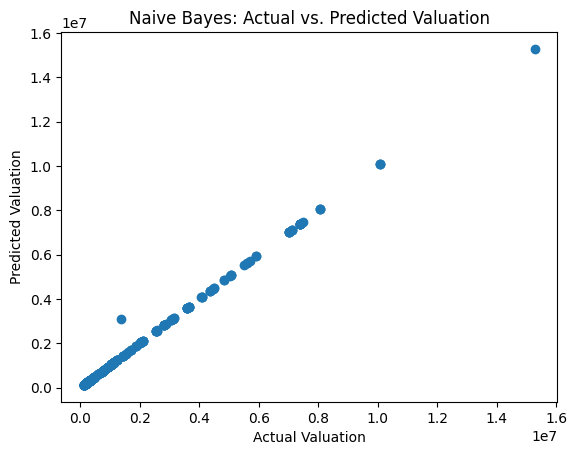

In [9]:
# Model training
model = GaussianNB()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {:.2f}%".format(accuracy))

# Plotting the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Valuation')
plt.ylabel('Predicted Valuation')
plt.title('Naive Bayes: Actual vs. Predicted Valuation')
plt.show()